In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import scipy 
import os
import keras
import sklearn
from tqdm import tqdm
from PIL import Image
import pickle
%matplotlib inline

Using TensorFlow backend.


In [5]:
train=pd.read_csv("Data/myntra_train_dataset.csv")
train.pop('Link_to_the_image')
train.shape

(70000, 5)

In [6]:
train_img_path='Train_Data/Train/'
train_img_names=os.listdir("Train_Data/Train/")
train_img_names.sort()

In [7]:
im_names=[]
for i in tqdm(range(len(train))):
    im_names.append(str(i)+"_"+train['Sub_category'][i]+'.jpg')

100%|██████████| 70000/70000 [00:07<00:00, 9953.47it/s]


In [8]:
train["Image_Names"]=im_names
rows_to_be_del=set(im_names).difference(set(train_img_names))
train.index=im_names

In [9]:
train.drop(rows_to_be_del,inplace=True)
train=train[['Brand', 'Category', 'Gender', 'Color', 'Image_Names','Sub_category']]

In [10]:
train.columns

Index(['Brand', 'Category', 'Gender', 'Color', 'Image_Names', 'Sub_category'], dtype='object')

train.to_csv("Cleaned_Train_Data.csv")

In [13]:
train_img_path

'Train_Data/Train/'


invalid_imgs = []
train_img=[]
for img_name in tqdm(train.index):
    try:
        img=cv2.imread(train_img_path+img_name)
        img=cv2.resize(img,(32,32))
        train_img.append(img)
    except:
        print('*')
        invalid_imgs.append(img_name)     

len(invalid_imgs)

for imgn in tqdm(invalid_imgs): os.remove(train_img_path+imgn)

def img_reader(img_path):
    img=cv2.imread(img_path)
    img=cv2.resize(img,(32,32))
    return(img)

## Image Resizer
def read_img_scipy(img_path):
    img = scipy.misc.imread(img_path)
    img = scipy.misc.imresize(img, (32,32))
    #img = img.astype('float32')
    return (img)

In [27]:
len(os.listdir(train_img_path))

69897

In [28]:
train_img_path

'Train_Data/Train/'

Y_train = {v:k for v,k in enumerate(sorted(set(labels), key=labels.index))}

a = [2,23,15,22,16,1,11,19,20,0,6,13,12,21,7,9,4,8,14,5,18,17,3,10]
b = dict(zip(a, range(24)))
Y_train = {b[k]: v for k,v in Y_train.items()}
len(Y_train)

Y_train = {0: 'Striped',
         1: 'Horizontal Stripes',
         2: 'Humour and Comic',
         3: 'Superhero',
         4: 'Music',
         5: 'Biker',
         6: 'People and Places',
         7: 'Varsity',
         8: 'Sports and Team Jersey',
         9: 'Graphic',
         10: 'Typography',
         11: 'Sports',
         12: 'Conversational',
         13: 'Polka Dots',
         14: 'Geometric',
         15: 'Abstract',
         16: 'Tie and Dye',
         17: 'Camouflage',
         18: 'Floral',
         19: 'Solid',
         20: 'Self Design',
         21: 'Checked',
         22: 'Colourblocked',
         23: 'Tribal'}

In [8]:
labels = ['Tribal', 'Polka Dots', 'Geometric','Solid','Self Design','Horizontal Stripes',
 'Striped','Checked','Tie and Dye','Colourblocked','Conversational','Camouflage','Floral',
 'Graphic','Abstract','Humour and Comic','Superhero','Sports','Varsity','Typography','Music',
 'People and Places','Biker','Sports and Team Jersey']

In [9]:
Y_train = dict(enumerate(labels))

In [10]:
Y_train_ = {k:v for v,k in Y_train.items()}

In [2]:
y_onehot = np.loadtxt('trn_224_39k_target.csv', delimiter=','); y_onehot.shape

(39309, 24)

labels= train['Sub_category'].tolist()

y_train = [Y_train_[l] for l in labels]; y_train[0]

In [17]:
train.index[0]

'0_Graphic.jpg'

path = '/home/met/ug/14145059/HackerEarth_DeepLearning_Challenge/Myntra/Train_Data/Train/'
fnames = [ path+n for n in train.index ]

x = pd.concat([train['Sub_category'], pd.Series(y_train, index=train.index, name='label')], axis=1)

x.reset_index(inplace=True)

x.head()

indxs = {}
for i in range(24):
    l = x.groupby(['label']).groups[i].values
    n = len(l)
    n = 671 if i==0 or i==19 else n
    indxs[i] = l[:n]

final_indxs = []
for k,v in indxs.items():
    final_indxs.extend(v)

len(final_indxs)

import random
random.shuffle(final_indxs)

fnames = [fnames[i] for i in final_indxs]; fnames[0]

f_dict = {'Class_labels':Y_train, 'Indicies': final_indxs, 'File_names': fnames}

%cd arrays/

import pickle
with open('trn_224_indicies_fnames_39k.pkl', 'wb') as f:
    pickle.dump(f_dict, f)

In [ ]:
y_train = x['label'].iloc[final_indxs].tolist()
from keras.utils import to_categorical
y_train = to_categorical(y_train)
np.savetxt('trn_224_39k_target.csv', y_train, delimiter=',')

In [4]:
path = '/home/met/ug/14145059/HackerEarth_DeepLearning_Challenge/Myntra'

In [5]:
with open(path+'/arrays/trn_224_indicies_fnames_39k.pkl', 'rb') as f:
    f_dict = pickle.load(f)

In [6]:
all_fnames = f_dict['File_names']; all_fnames[0]

'/home/met/ug/14145059/HackerEarth_DeepLearning_Challenge/Myntra/Train_Data/Train/69236_Camouflage.jpg'

In [23]:
len(all_fnames)

39309

final_indxs = f_dict['Indicies']
# Y_train = f_dict['Class_labels']

In [25]:
len(final_indxs)

39309

In [3]:
# fnames = all_fnames[:31447]; val_fnames = all_fnames[31447:]
y_train = y_onehot[:31447]; y_val = y_onehot[31447:]

In [14]:
len(val_fnames)

7862

In [30]:
y_train.shape

(39309, 24)

In [16]:
y_train[0].argmax()

11

In [17]:
Y_train[11]

'Camouflage'

In [18]:
fnames[0]

'/home/met/ug/14145059/HackerEarth_DeepLearning_Challenge/Myntra/Train_Data/Train/69236_Camouflage.jpg'

In [76]:
i=0

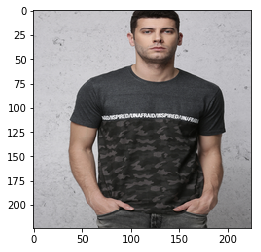

In [77]:
img = Image.open(fnames[i])
# resized = np.round(np.multiply(new_s/img.width, img.size)).astype(int)
img = img.resize((224,224), Image.ANTIALIAS)
# img = img.crop((0,60,224,224)).resize((224,224), Image.ANTIALIAS)
plt.imshow(img); i+=1

In [105]:
new_s = 224
n = len(val_fnames); n

7862

## Update path

In [4]:
import threading, bcolz
from PIL import Image
from concurrent.futures import ThreadPoolExecutor
from bcolz_array_iterator import BcolzArrayIterator

In [103]:
bc_path = '/home/met/ug/14145059/HackerEarth_DeepLearning_Challenge/Myntra/val_224_224_8k.bc'

In [106]:
def resize_img(i):
    img = Image.open(val_fnames[i])
    s = np.array(img).shape
    if len(s)!=3 or s[2]!=3: return
    return img.resize((new_s, new_s), Image.BILINEAR)

In [107]:
tl = threading.local()
tl.place = np.zeros((new_s,new_s,3), 'uint8')
arr = bcolz.carray(np.empty((0, new_s, new_s, 3), 'float32'), 
                   chunklen=16, mode='w', rootdir=bc_path)

In [108]:
def app_img(r):
    tl.place[:] = (np.array(r) if r else 0.)
    arr.append(tl.place)

In [109]:
step=1400
for i in tqdm(range(0, n, step)):
    with ThreadPoolExecutor(max_workers=16) as execr:
        res = execr.map(resize_img, range(i, min(i+step, n)))
        for r in res: app_img(r)
    arr.flush()

100%|██████████| 6/6 [01:27<00:00, 14.58s/it]


In [51]:
train_arr = bcolz.open('/home/met/ug/14145059/HackerEarth_DeepLearning_Challenge/Myntra/trn_224_224_31k.bc')

In [28]:
val_arr = bcolz.open('/home/met/ug/14145059/HackerEarth_DeepLearning_Challenge/Myntra/val_224_224_8k.bc')

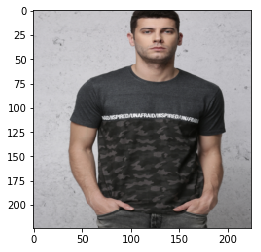

In [112]:
plt.imshow(train_arr[0].astype('uint8'))

## Test Data Preprocessing

In [9]:
test=pd.read_csv("Data/myntra_test.csv")

In [10]:
test.head(2)

Brand Category Gender   Color  \
0  Allen Solly  Tshirts    Men     Red   
1        Celio  Tshirts    Men  Yellow   

                                   Link_to_the_image  
0  http://myntra.myntassets.com/assets/images/182...  
1  http://myntra.myntassets.com/assets/images/109...

In [11]:
test=test.iloc[:,:-1]

In [5]:
test_img_path='/home/met/ug/14145059/HackerEarth_DeepLearning_Challenge/Myntra/Test_Data/Test/'

In [6]:
test_img_names=os.listdir(test_img_path)
test_img_names.sort()

In [7]:
len(test_img_names)

14952

In [12]:
test_im_names=[]
for i in tqdm(range(len(test))):
    test_im_names.append(str(i)+".jpg")

100%|██████████| 15000/15000 [00:00<00:00, 498775.63it/s]


In [13]:
test["Image_Names"]=test_im_names

In [14]:
test.head(2)

Brand Category Gender   Color Image_Names
0  Allen Solly  Tshirts    Men     Red       0.jpg
1        Celio  Tshirts    Men  Yellow       1.jpg

In [15]:
len(set(test_im_names).difference(set(test_img_names)))

48

In [16]:
test.index=test_im_names

In [17]:
test.drop(list(set(test_im_names).difference(set(test_img_names))),inplace=True)

In [18]:
test.shape

(14952, 5)

In [98]:
test.to_csv("Cleaned_Test_Data.csv",index=False)

In [19]:
bc_path = '/home/met/ug/14145059/HackerEarth_DeepLearning_Challenge/Myntra/test_224_224.bc'

In [20]:
test.index[0]

'0.jpg'

In [21]:
test_img_path='/home/met/ug/14145059/HackerEarth_DeepLearning_Challenge/Myntra/Test_Data/Test/'
fnames = [ test_img_path+n for n in test.index ]

In [22]:
fnames[1]

'/home/met/ug/14145059/HackerEarth_DeepLearning_Challenge/Myntra/Test_Data/Test/1.jpg'

In [23]:
new_s = 224
n = len(fnames); n

14952

In [24]:
def resize_img(i):
    img = Image.open(fnames[i])
    s = np.array(img).shape
    if len(s)!=3 or s[2]!=3: return
    return img.resize((new_s, new_s), Image.BILINEAR)

In [25]:
tl = threading.local()

In [26]:
tl.place = np.zeros((new_s,new_s,3), 'uint8')

In [27]:
test_arr = bcolz.carray(np.empty((0, new_s, new_s, 3), 'float32'), 
                   chunklen=16, mode='w', rootdir=bc_path)

In [28]:
def app_img(r):
    tl.place[:] = (np.array(r) if r else 0.)
    test_arr.append(tl.place)

In [29]:
step=6900
for i in tqdm(range(0, n, step)):
    with ThreadPoolExecutor(max_workers=16) as execr:
        res = execr.map(resize_img, range(i, min(i+step, n)))
        for r in res: app_img(r)
    test_arr.flush()

100%|██████████| 3/3 [02:56<00:00, 58.78s/it]


In [30]:
test_arr = bcolz.open(bc_path)

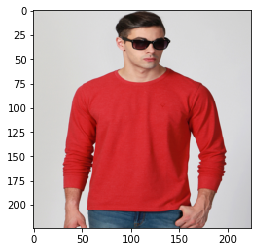

In [31]:
plt.imshow(test_arr[0].astype('uint8'))

## Modelling

In [41]:
from keras.layers import *

In [42]:
from keras.models import Model
from keras.models import model_from_json
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
with open("models/model2.json", 'r') as file:
    model_1 = file.read()
model_1 = model_from_json(model_1)

In [ ]:
model_1.summary()

In [223]:
model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [212]:
early_stops = EarlyStopping(patience=3, monitor='val_acc')

In [213]:
arr.shape; y_train.shape

(69897, 24)

In [214]:
bc_it = BcolzArrayIterator(arr, y_train, shuffle=True, batch_size=64)

In [224]:
hist = model_1.fit_generator(bc_it, steps_per_epoch=10, epochs=1,
            validation_data=bc_it, validation_steps=4,callbacks=[early_stops])

Epoch 1/1
10/10 [==============================] - 87s 9s/step - loss: 0.1513 - acc: 0.9555 - val_loss: 0.5418 - val_acc: 0.9583


In [225]:
a = model_1.predict(arr[1:2])
print(np.argmax(a), a)

15 [[ 0.43344995  0.40079364  0.41313806  0.41698951  0.38993439  0.40731564
   0.42580613  0.34274948  0.38946727  0.43842009  0.46157637  0.42316398
   0.43126908  0.38612616  0.42636666  0.46729726  0.37152529  0.30615035
   0.45041597  0.38960367  0.409338    0.40473434  0.44911742  0.43817362]]


In [222]:
y_train[1].argmax()

18

In [216]:
hist.history

{'acc': [0.27187499999999998],
 'loss': [2.4393180489540098],
 'val_acc': [0.29296875],
 'val_loss': [2.8421585559844971]}

In [26]:
Y_train

{0: 'Graphic',
 1: 'Biker',
 2: 'Striped',
 3: 'Colourblocked',
 4: 'Tie and Dye',
 5: 'Solid',
 6: 'Typography',
 7: 'Geometric',
 8: 'Camouflage',
 9: 'Abstract',
 10: 'Tribal',
 11: 'People and Places',
 12: 'Conversational',
 13: 'Sports',
 14: 'Floral',
 15: 'Humour and Comic',
 16: 'Music',
 17: 'Checked',
 18: 'Self Design',
 19: 'Varsity',
 20: 'Sports and Team Jersey',
 21: 'Polka Dots',
 22: 'Superhero',
 23: 'Horizontal Stripes'}

In [15]:
train.Sub_category.value_counts()

Solid                     22288
Typography                13107
Striped                    9642
Graphic                    6551
Colourblocked              2538
Abstract                   2302
Geometric                  2060
People and Places          1702
Floral                     1632
Humour and Comic           1515
Conversational             1367
Superhero                  1213
Biker                       671
Sports                      621
Varsity                     608
Sports and Team Jersey      401
Music                       358
Self Design                 332
Tie and Dye                 307
Camouflage                  207
Checked                     196
Tribal                      141
Polka Dots                  137
Horizontal Stripes            1
Name: Sub_category, dtype: int64

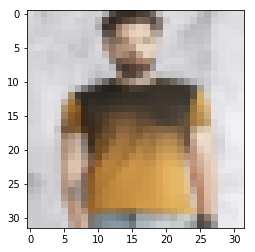

In [207]:
plt.imshow(arr[21].astype('uint8'))

from keras.layers import Convolution2D

model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', padding='same',input_shape = (64,64,3))) # if you resize the image above, change the shape
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Convolution2D(128, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [47]:
mean_img=np.mean(X_train,axis=0)

In [48]:
std_img=np.std(X_train,axis=0)

In [49]:
X_norm_train=(X_train-mean_img)/std_img
X_norm_test=(X_test-mean_img)/std_img

In [50]:
model.fit(X_norm_train, y_train, batch_size=100, epochs=10, validation_split=0.3, callbacks=[early_stops])

Train on 7000 samples, validate on 3000 samples
Epoch 1/10
7000/7000 [==============================] - 256s 37ms/step - loss: 2.0526 - acc: 0.3869 - val_loss: 2.0789 - val_acc: 0.4183
Epoch 2/10
7000/7000 [==============================] - 344s 49ms/step - loss: 1.5033 - acc: 0.5906 - val_loss: 1.9209 - val_acc: 0.4890
Epoch 3/10
7000/7000 [==============================] - 266s 38ms/step - loss: 1.3607 - acc: 0.6286 - val_loss: 1.8925 - val_acc: 0.5140
Epoch 4/10
7000/7000 [==============================] - 218s 31ms/step - loss: 1.2447 - acc: 0.6517 - val_loss: 1.8459 - val_acc: 0.5267
Epoch 5/10
7000/7000 [==============================] - 307s 44ms/step - loss: 1.1820 - acc: 0.6641 - val_loss: 1.8441 - val_acc: 0.5080
Epoch 6/10
7000/7000 [==============================] - 287s 41ms/step - loss: 1.1149 - acc: 0.6787 - val_loss: 1.8355 - val_acc: 0.5140
Epoch 7/10
7000/7000 [==============================] - 268s 38ms/step - loss: 1.0665 - acc: 0.6863 - val_loss: 1.8404 - val_acc: 

In [51]:
predictions=model.predict(X_norm_test)

In [52]:
predictions = np.argmax(predictions, axis= 1)

In [53]:
y_maps = dict()
y_maps = {v:k for k, v in Y_train.items()}
pred_labels = [y_maps[k] for k in predictions]

## Resnet

In [1]:
from keras.layers import *

Using TensorFlow backend.


In [2]:
from keras.models import Model
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [16]:
def decode_predictions(preds, top=1):
    global Y_train
    if len(preds.shape) != 2 or preds.shape[1] != 24:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
#     if Y_train is None:
#         with open(path+'/arrays/trn_224_indicies_fnames_39k.pkl', 'rb') as f:
#             f_dict = pickle.load(f)
#         Y_train = f_dict['Class_labels']
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [(Y_train[i],) + (pred[i],) for i in top_indices]
        result.sort(key=lambda x: x[1], reverse=True)
        results.append(result)
    return results

for l in m_resnet.layers: l.trainable = False

In [3]:
inp = Input((224,224,3))
preproc = Lambda(preprocess_input)(inp)
m_resnet = ResNet50(include_top=False, input_tensor=preproc)
for l in m_resnet.layers: l.trainable = False

In [41]:
m = Model(m_resnet.input, m_resnet.get_layer('activation_72').output)

In [4]:
m_resnet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        lambda_1[0][0]                   
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [8]:
path = '/home/met/ug/14145059/HackerEarth_DeepLearning_Challenge/Myntra/'

x = m_resnet.predict(arr[0:1]); x

mid_feats = m_resnet.predict(train_arr, batch_size=128, verbose=1)

mid_feats = bcolz.carray(mid_feats,
                          rootdir=path+'arrays/mid_feats_trn.bc', chunklen=64, mode='w')
mid_feats.flush()

In [56]:
mid_feats = bcolz.carray(np.empty((0,28,28,512), 'float32'),
                          rootdir=path+'arrays/mid_feats_trn.bc', chunklen=64, mode='w')

In [57]:
def gen_flat_features():
    n = len(train_arr)
    gen = (train_arr[i:min(i+1280,n)] for i in range(0, n, 1280))
    for i,batch in tqdm(enumerate(gen)):
        mid_feats.append(m_resnet.predict(batch))
        mid_feats.flush()
    mid_feats.flush()

In [25]:
mid_feats = bcolz.carray(np.empty((0,28,28,512), 'float32'),
                          rootdir=path+'arrays/mid_feats_val.bc', chunklen=64, mode='w')

In [26]:
def gen_flat_features():
    n = len(val_arr)
    gen = (val_arr[i:min(i+1280,n)] for i in range(0, n, 1280))
    for i,batch in tqdm(enumerate(gen)):
        mid_feats.append(m_resnet.predict(batch))
        mid_feats.flush()
    mid_feats.flush()

In [37]:
gen_flat_features()

7it [36:39, 314.22s/it]


In [9]:
mid_feats_trn = bcolz.open(path+'/arrays/mid_feats_trn.bc')

In [10]:
mid_feats_trn.shape

(31447, 28, 28, 512)

In [11]:
mid_feats_val = bcolz.open(path+'arrays/mid_feats_val.bc')

In [12]:
mid_feats_val.shape

(7862, 28, 28, 512)

# Conv Model

In [17]:
ip = Input(mid_feats_trn.shape[1:])
x = Conv2D(24, 3, padding='same')(ip)
x = GlobalAveragePooling2D()(x)
x = Activation('softmax')(x)
cv_model = Model(ip, x)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [18]:
cv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


early_stops = EarlyStopping(patience=3, monitor='val_acc')

In [19]:
print(mid_feats_trn.shape, y_train.shape)

(31447, 28, 28, 512) (31447, 24)


In [32]:
bc_it = BcolzArrayIterator(mid_feats_trn, y_train, batch_size=64)

In [33]:
bc_it_val = BcolzArrayIterator(mid_feats_val, y_val, batch_size=64)

In [34]:
hist = cv_model.fit_generator(bc_it, steps_per_epoch=491, validation_data=bc_it_val, validation_steps=120,
                              epochs=1)#, callbacks=[early_stops])

Epoch 1/1
491/491 [==============================] - 345s 703ms/step - loss: 2.1295 - acc: 0.4463 - val_loss: 2.0087 - val_acc: 0.4643


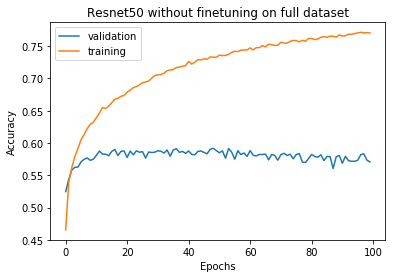

In [140]:
fig = plt.figure()
plt.plot(hist.history['val_acc'], label='validation')
plt.plot(hist.history['acc'], label='training')
plt.legend()
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.title('Resnet50 without finetuning on full dataset')
fig.savefig('resnet_wo_finetune_training_acc_2.png')

In [37]:
ip = m_resnet.input
x = m_resnet.output
out = cv_model(x)
full_model = Model(ip, out)

ValueError: number of input channels does not match corresponding dimension of filter, 128 != 512

In [131]:
full_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        lambda_1[0][0]                   
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

### FC Model

In [137]:
ip = Input(flat_feats.shape[1:])
x = Dense(24, activation='softmax')(ip)
fc_model = Model(ip, x)

In [138]:
fc_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [155]:
early_stops = EarlyStopping(patience=3, monitor='val_acc')

In [52]:
print(flat_feats.shape, y_train.shape)

(12032, 2048) (12032, 24)


In [139]:
hist = fc_model.fit(flat_feats_trn, y_train, batch_size=128, epochs=100,
            validation_data=(flat_feats_val, y_val))#, callbacks=[early_stops])

Train on 31447 samples, validate on 7862 samples
Epoch 1/100
31447/31447 [==============================] - 14s 449us/step - loss: 1.8113 - acc: 0.4655 - val_loss: 1.6031 - val_acc: 0.5248
Epoch 2/100
31447/31447 [==============================] - 14s 435us/step - loss: 1.5051 - acc: 0.5392 - val_loss: 1.5154 - val_acc: 0.5438
Epoch 3/100
31447/31447 [==============================] - 13s 412us/step - loss: 1.4150 - acc: 0.5623 - val_loss: 1.4613 - val_acc: 0.5581
Epoch 4/100
31447/31447 [==============================] - 13s 403us/step - loss: 1.3523 - acc: 0.5788 - val_loss: 1.4521 - val_acc: 0.5625
Epoch 5/100
31447/31447 [==============================] - 13s 404us/step - loss: 1.3049 - acc: 0.5916 - val_loss: 1.4281 - val_acc: 0.5627
Epoch 6/100
31447/31447 [==============================] - 13s 416us/step - loss: 1.2657 - acc: 0.6049 - val_loss: 1.4087 - val_acc: 0.5707
Epoch 7/100
31447/31447 [==============================] - 13s 405us/step - loss: 1.2361 - acc: 0.6131 - val_lo

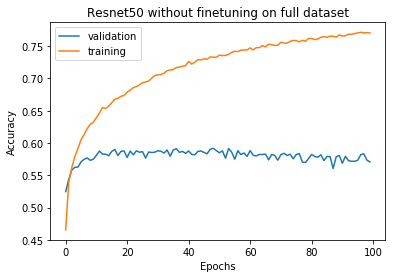

In [140]:
fig = plt.figure()
plt.plot(hist.history['val_acc'], label='validation')
plt.plot(hist.history['acc'], label='training')
plt.legend()
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.title('Resnet50 without finetuning on full dataset')
fig.savefig('resnet_wo_finetune_training_acc_2.png')

In [185]:
a = fc_model.predict(flat_feats[1:2])
print(decode_predictions(a, 3))
print(Y_train[y_train[1].argmax()])

[[('Typography', 0.8196038), ('Geometric', 0.10239816), ('Sports', 0.034700252)]]
Typography


In [142]:
hist.history['val_acc'][-10:]

[0.56868481290337392,
 0.57936911715165684,
 0.5726278300990103,
 0.57161027716183233,
 0.57173747133583974,
 0.57326380036253866,
 0.58204019328954115,
 0.58318494002165855,
 0.57339099468817334,
 0.57071991855028903]

In [143]:
y_pred = fc_model.predict(flat_feats_val, batch_size=128)

In [144]:
y_val_l = [i.argmax() for i in y_val]
y_pred_l = [i.argmax() for i in y_pred]

In [145]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [146]:
cm = confusion_matrix(y_val_l, y_pred_l, labels=list(range(24)))

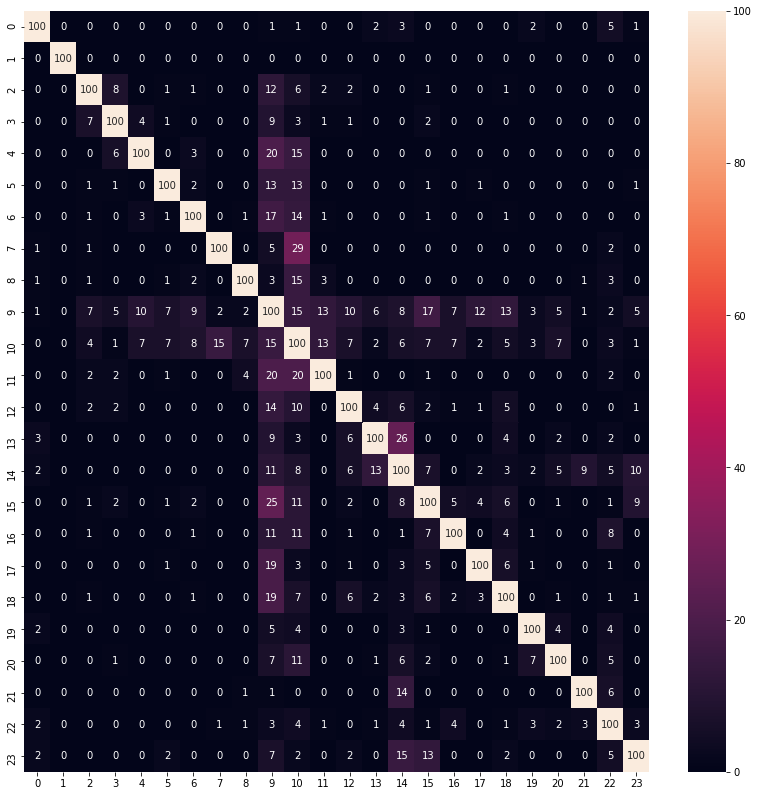

In [188]:
plt.figure(figsize=(14,14))
ax = plt.gca()
cm_plot = sns.heatmap(cm_n_, ax=ax, annot=True, fmt='d').get_figure()

In [187]:
cm_n_ = cm_n_.astype('int64')

In [186]:
cm_n_ = cm_n*100

In [189]:
cm_plot.savefig('confusion_matrix_resnet_wo_finetune_2.png')

In [159]:
cm_n = []

In [160]:
for r in cm:
    s = np.sum(r)
    if s==0: s=1
    r_ = [i/s for i in r]
    cm_n.append(r_)

In [161]:
cm_n = np.array(cm_n)

In [164]:
cm_o = cm_n
for i,r in enumerate(cm_n):
    for j,_ in enumerate(r):
        if i==j: cm_o[i][j] = 1
        else: cm_o[i][j] = (cm_n[i][j] + cm_n[j][i])/2

In [165]:
cm_s = 1-cm_o

cm_s

In [167]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
# from scipy.spatial.distance import dist

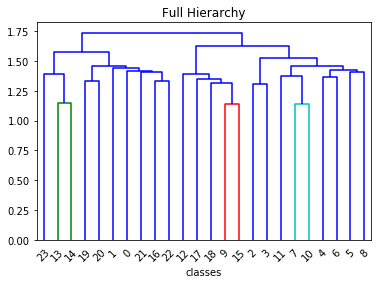

In [168]:
fig = plt.figure()
z = linkage(cm_s, 'ward')
dd = dendrogram(z, truncate_mode=None)
plt.xlabel('classes'); plt.title('Full Hierarchy')
fig.savefig('Hierarchy_2.png')

In [223]:
with open('dendrogram.pkl', 'w') as f:
    pickle.dump(dd, f)

TypeError: write() argument must be str, not bytes

In [174]:
[Y_train[l] for l in dd['leaves']]

['Tribal',
 'Polka Dots',
 'Geometric',
 'Solid',
 'Self Design',
 'Horizontal Stripes',
 'Striped',
 'Checked',
 'Tie and Dye',
 'Colourblocked',
 'Conversational',
 'Camouflage',
 'Floral',
 'Graphic',
 'Abstract',
 'Humour and Comic',
 'Superhero',
 'Sports',
 'Varsity',
 'Typography',
 'Music',
 'People and Places',
 'Biker',
 'Sports and Team Jersey']

In [193]:
class_indx = train.groupby('Sub_category').groups

clusters = [[2,23], [15,22], [16,1,11],[19,20],[0,6,13],[12,21,7,9],[4,8,14],[5,18],[17,3,10]]

In [190]:
clusters = [[23,13,14], [19,20],[1,0,21],[16,22],[12,17],[18,9,15],[2,3],
            [11,7,10], [4,6],[5,8]]

In [191]:
path = '/home/met/ug/14145059/HackerEarth_DeepLearning_Challenge/Myntra/Train_Data/Train/'

[23, 13, 14]
[19, 20]
[1, 0, 21]
[16, 22]
[12, 17]
[18, 9, 15]
[2, 3]
[11, 7, 10]
[4, 6]
[5, 8]


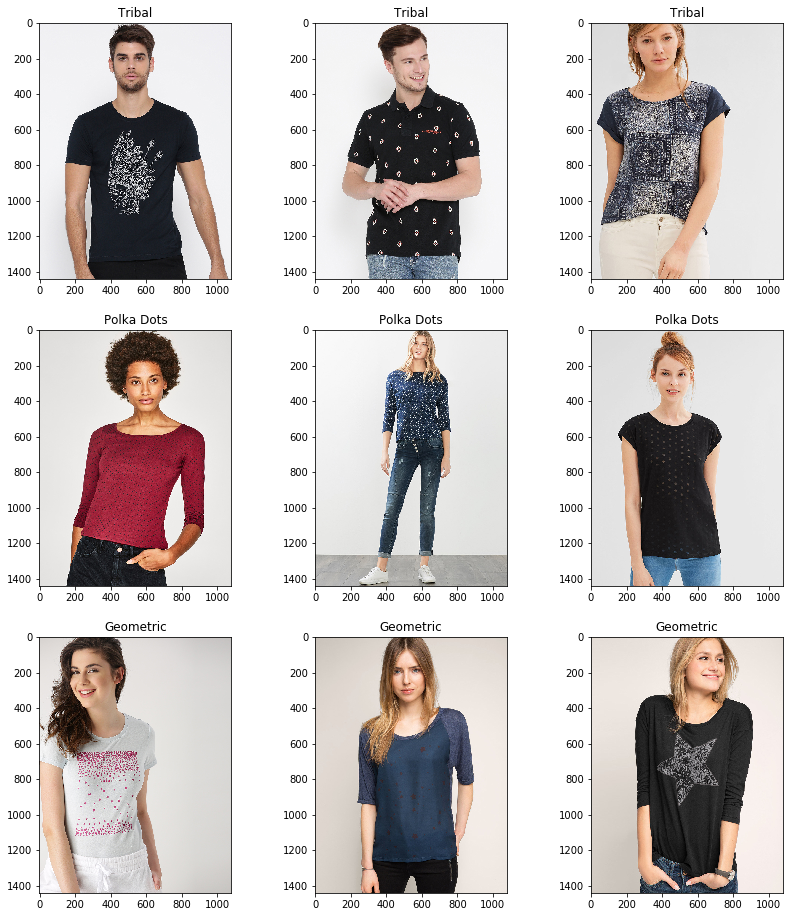

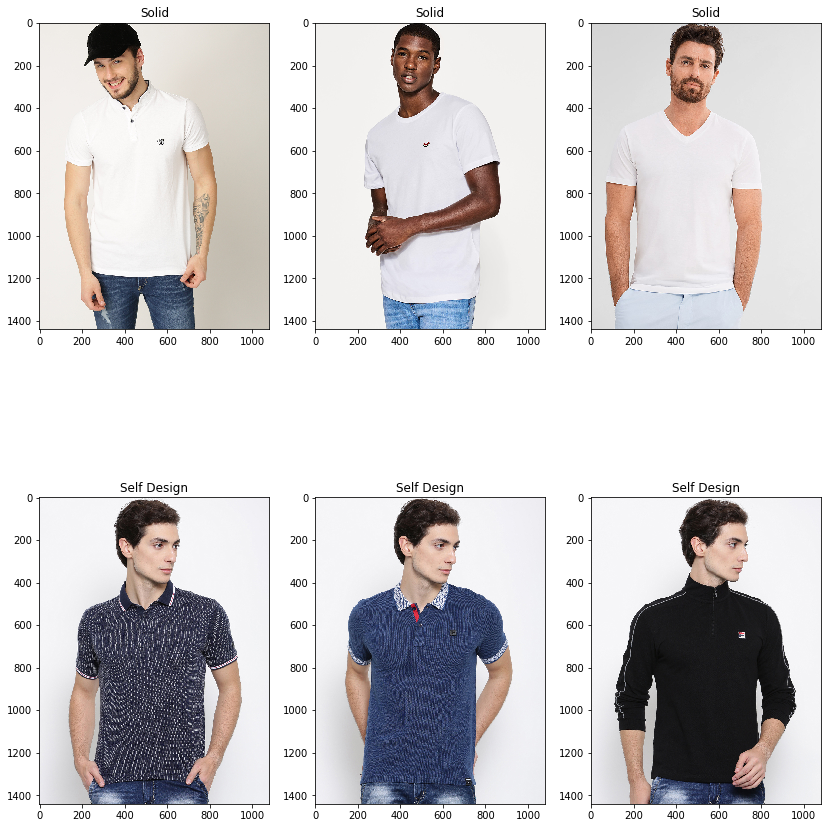

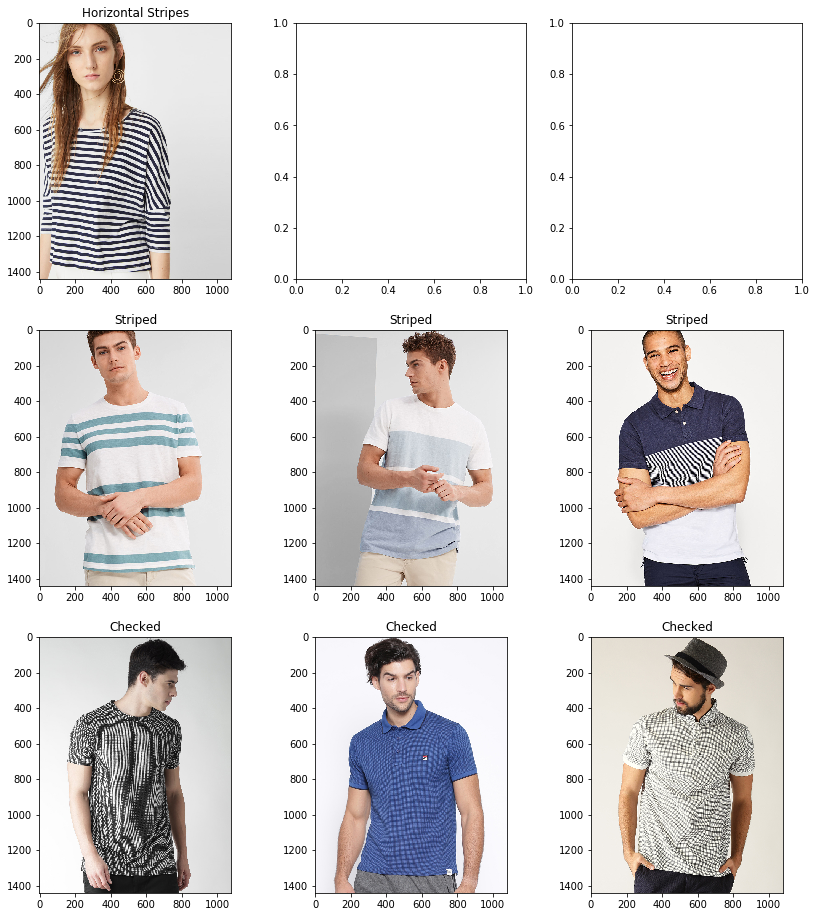

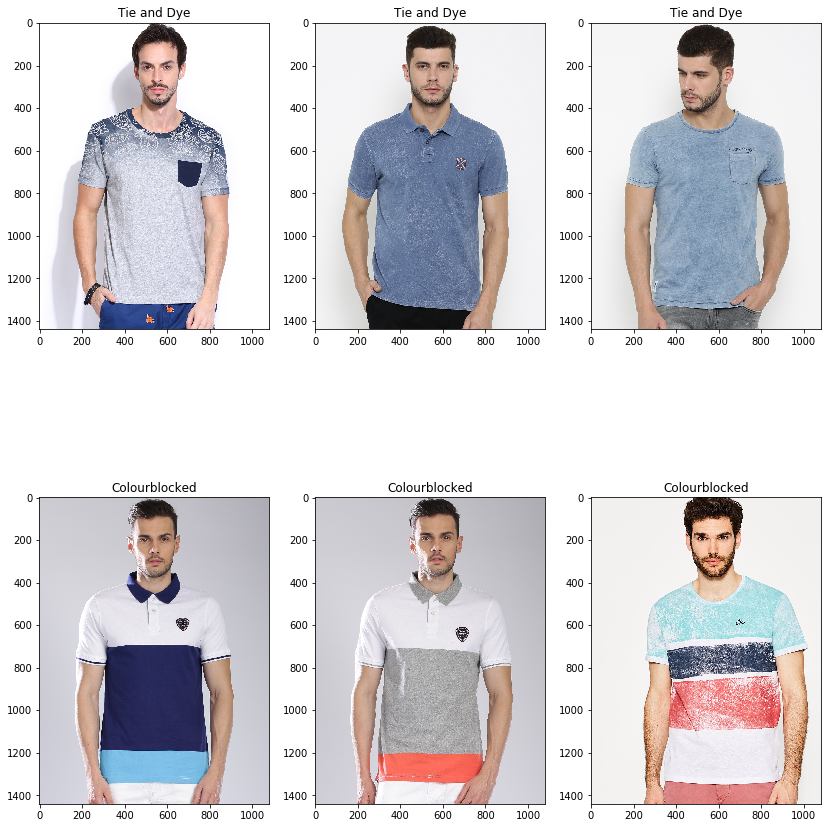

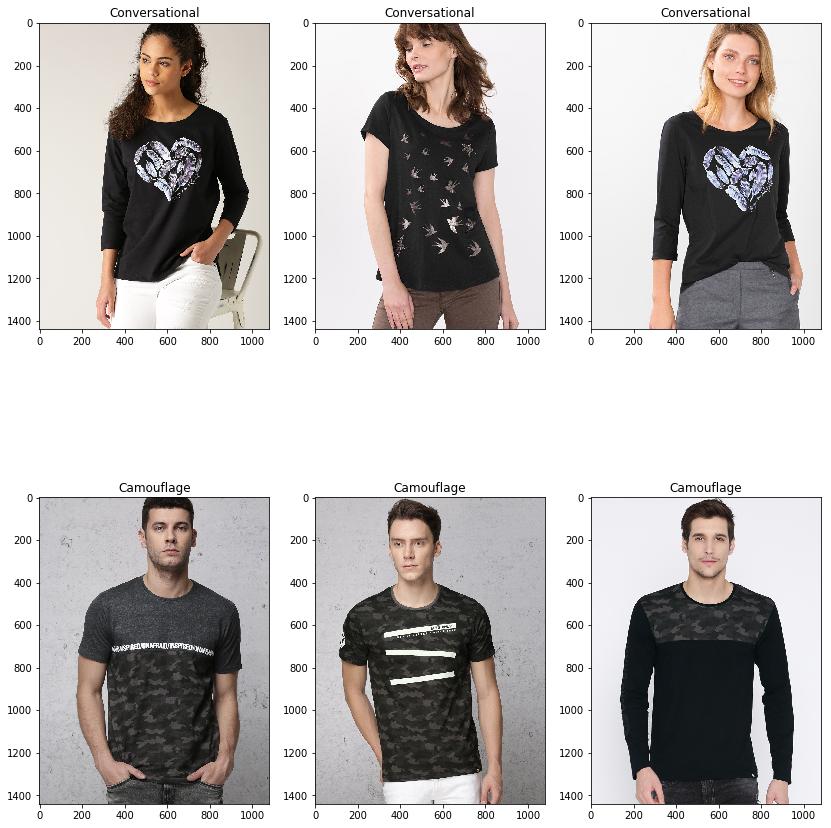

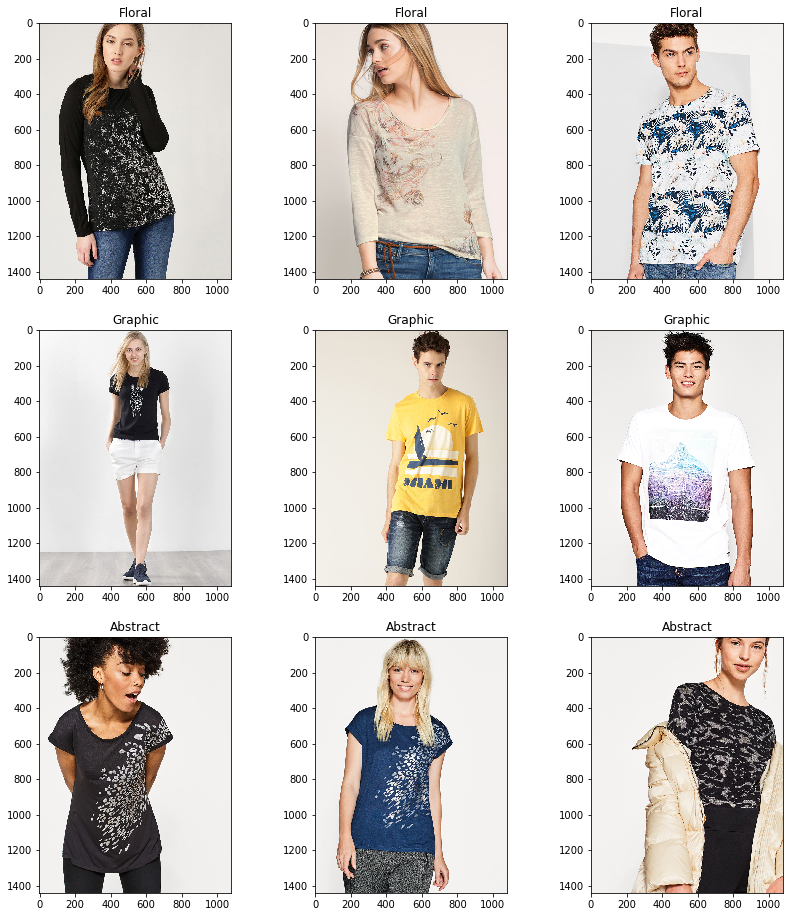

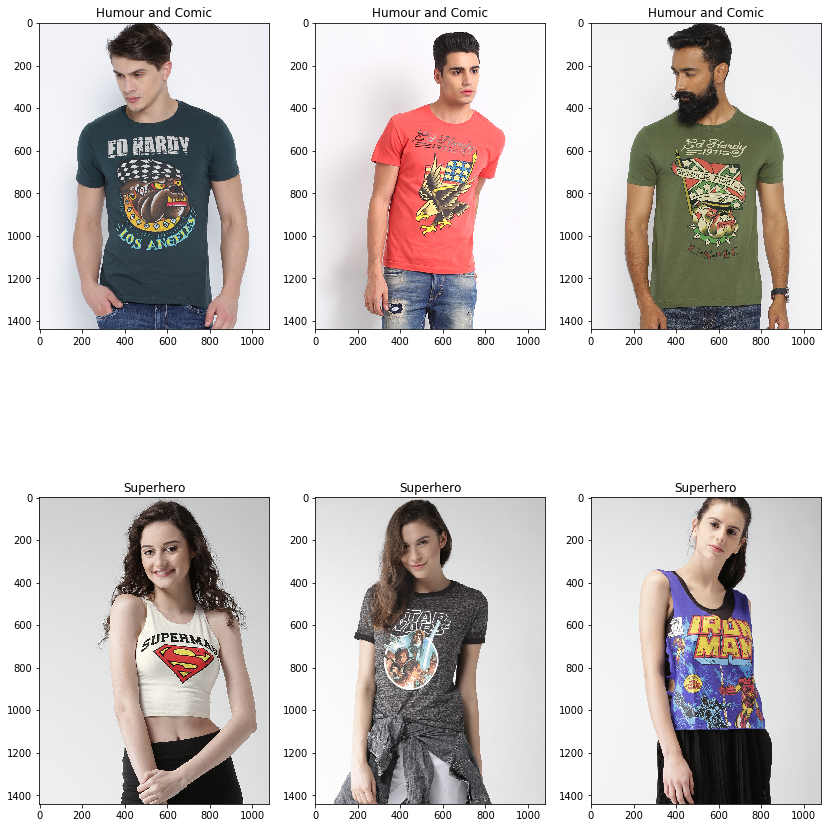

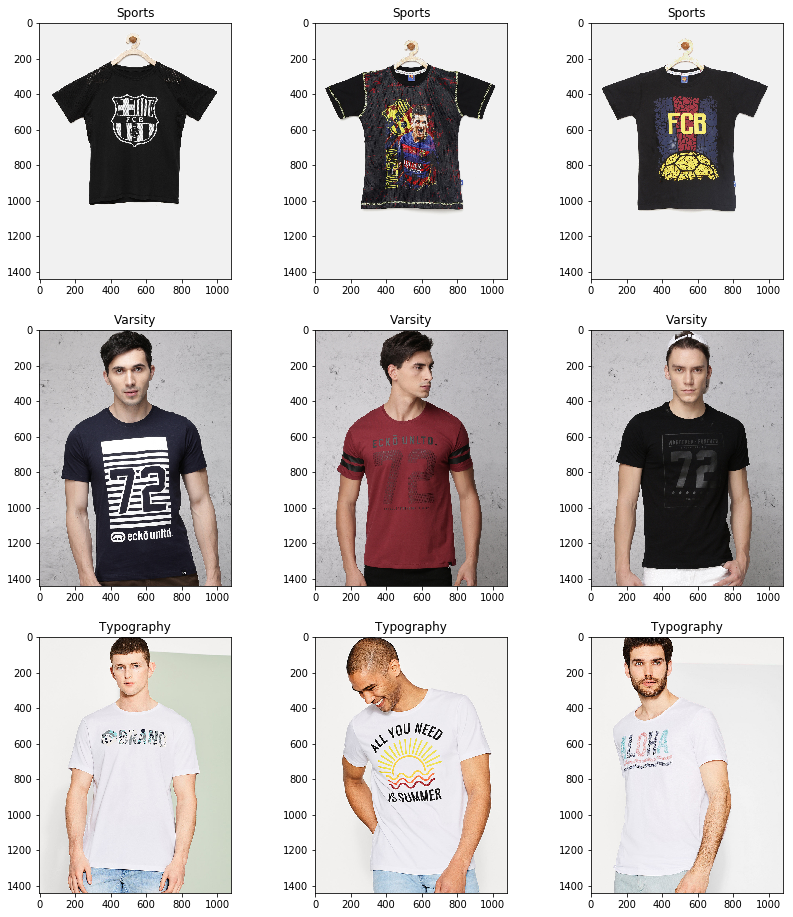

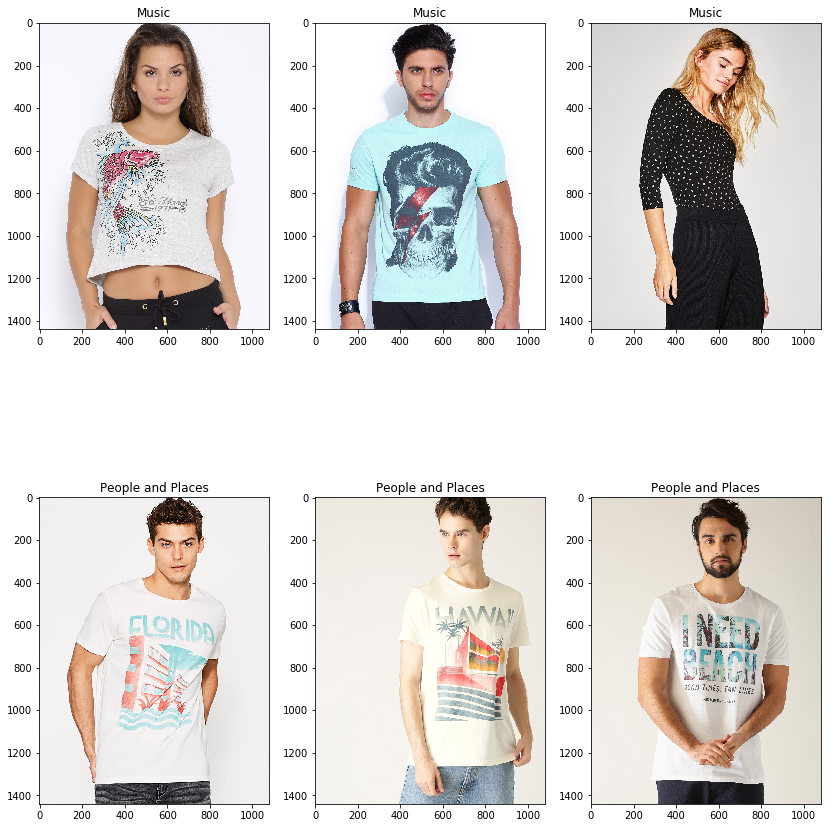

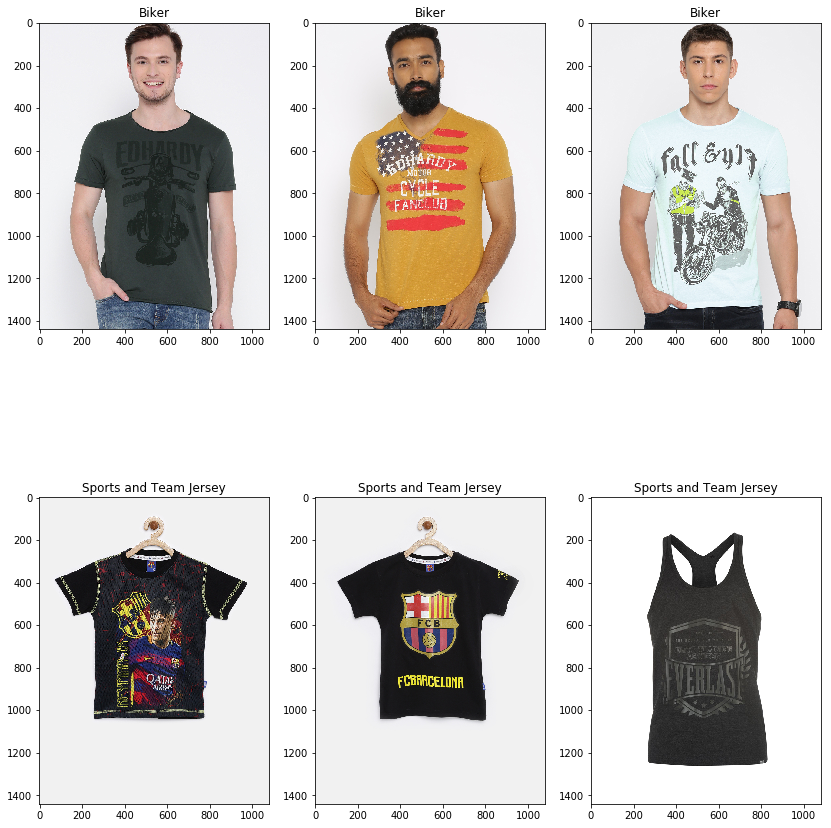

In [195]:
for c in clusters:
    print(c)
    fig, axList =plt.subplots(nrows=len(c), ncols=3)
    fig.set_size_inches(14,16)
    name = 'c2_'
    for e, n in enumerate(c):
        name +=  '_'+ Y_train[n]
        l = class_indx[Y_train[n]][-3:]
        for f, i in enumerate(l):
            axList[e][f].imshow(Image.open(path+i))
            axList[e][f].set_title(Y_train[n])
    fig.savefig('images/'+name+'.png')

In [130]:
ip = m_resnet.input
x = m_resnet.output
out = fc_model(x)
full_model = Model(ip, out)

In [131]:
full_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        lambda_1[0][0]                   
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [132]:
full_model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [133]:
from keras.preprocessing.image import ImageDataGenerator

In [144]:
test_path = '/home/met/ug/14145059/HackerEarth_DeepLearning_Challenge/Myntra/Test_Data'

In [145]:
gen = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), batch_size=128, shuffle=False, class_mode=None)

Found 14952 images belonging to 2 classes.


In [147]:
pred_probs = full_model.predict_generator(gen, workers=10, use_multiprocessing=True, verbose=1)

(128, 224, 224, 3)

In [214]:
train.Color.value_counts()

Blue                 10337
Black                 9615
White                 9280
Navy Blue             6640
Red                   4280
Grey                  3984
Grey Melange          3267
Green                 3144
Yellow                2704
Pink                  1958
Charcoal              1659
Orange                1639
Maroon                1452
Off White             1415
Olive                 1123
Purple                 849
Multi                  725
Coral                  659
Teal                   532
Brown                  531
Burgundy               529
Beige                  502
Peach                  417
Mustard                376
Cream                  347
Rust                   303
Turquoise Blue         299
Sea Green              202
Lime Green             146
Khaki                  122
Fluorescent Green      121
Taupe                  103
Lavender                93
Mauve                   83
Magenta                 76
Coffee Brown            39
Tan                      6
G

In [ ]:
pred_labels = [Y_train[n] for n in np.argmax(pred_probs, axis=1)]

### Submission

sub = pd.DataFrame({'detected':[Y_train[l] for l in y_pred_l]})
# sub.to_csv('resnet_submission.csv', index=False)

In [54]:
# df_test=pd.read_csv("Data/myntra_test.csv")
df_sub=pd.read_csv("Data/Submission_online.csv")

In [87]:
df_sub.head(2)

Brand Category Gender   Color  \
0.jpg  Allen Solly  Tshirts    Men     Red   
1.jpg        Celio  Tshirts    Men  Yellow   

                                       Link_to_the_image  Sub_category  
0.jpg  http://myntra.myntassets.com/assets/images/182...           NaN  
1.jpg  http://myntra.myntassets.com/assets/images/109...           NaN

In [58]:
df_sub["Sub_category"]=pred_labels

In [ ]:
# sub = pd.DataFrame({ 'detected':pred_labels})
df_sub.to_csv('submission.csv', index=False)

df_sub.reset_index(inplace=True)
test.reset_index(inplace=True)
sub_2=df_sub.merge(test,on="index",how='outer',)
sub_2=sub_2[['Brand_x', 'Category_x', 'Gender_x', 'Color_x', 'Link_to_the_image_x',
       'Sub_category_y']]


sub_2.rename(columns={'Brand_x':'Brand',
                      'Category_x':'Category',
                      'Gender_x':'Gender',
                      "Color_x":"Color",
                      "Link_to_the_image_x":"Link_to_the_image",
                      'Sub_category_y':"Sub_category"
                      
    
},inplace=True)
sub_2['Sub_category'].fillna("Solid",inplace=True)
sub_2.to_csv("64_64_10k.csv",index=False)

## Model on Full Data

In [ ]:
"""train_img=[]
for img_name in tqdm(train.index):
    img=cv2.imread(train_img_path+img_name)
    img=cv2.resize(img,(64,64))
    train_img.append(img)
X_train=np.array(train_img,np.float32)
X_train=X_train/255.0"""
labels= train['Sub_category'].tolist()
#class_list = train['detected'].tolist()
Y_train = {k:v+1 for v,k in enumerate(set(labels))}
y_train = [Y_train[k] for k in labels]
y_train = to_categorical(y_train)
early_stops = EarlyStopping(patience=3, monitor='val_acc')

model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', padding='same',input_shape = (64,64,3))) # if you resize the image above, change the shape
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3,3), activation='relu', padding='same'))
model.add(Convolution2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, y_train, batch_size=100, epochs=30, validation_split=0.3, callbacks=[early_stops])
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis= 1)

y_maps = dict()
y_maps = {v:k for k, v in Y_train.items()}
pred_labels = [y_maps[k] for k in predictions]
sub = pd.DataFrame({'row_id':test_img_names, 'detected':pred_labels})
sub.to_csv('submission_full_64.csv', index=False)

Train on 48927 samples, validate on 20970 samples
Epoch 1/30
48927/48927 [==============================] - 679s 14ms/step - loss: 1.9412 - acc: 0.4583 - val_loss: 1.7038 - val_acc: 0.5175
Epoch 2/30
13500/48927 [=======>......................] - ETA: 6:54 - loss: 1.6596 - acc: 0.5484